Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.5298 - accuracy: 0.4443 - val_loss: 0.4519 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4256 - accuracy: 0.4884 - val_loss: 0.4039 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3988 - accuracy: 0.4914 - val_loss: 0.3860 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3838 - accuracy: 0.4937 - val_loss: 0.3709 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3713 - accuracy: 0.4958 - val_loss: 0.3583 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3610 - accuracy: 0.4976 - val_loss: 0.3476 - val_ac

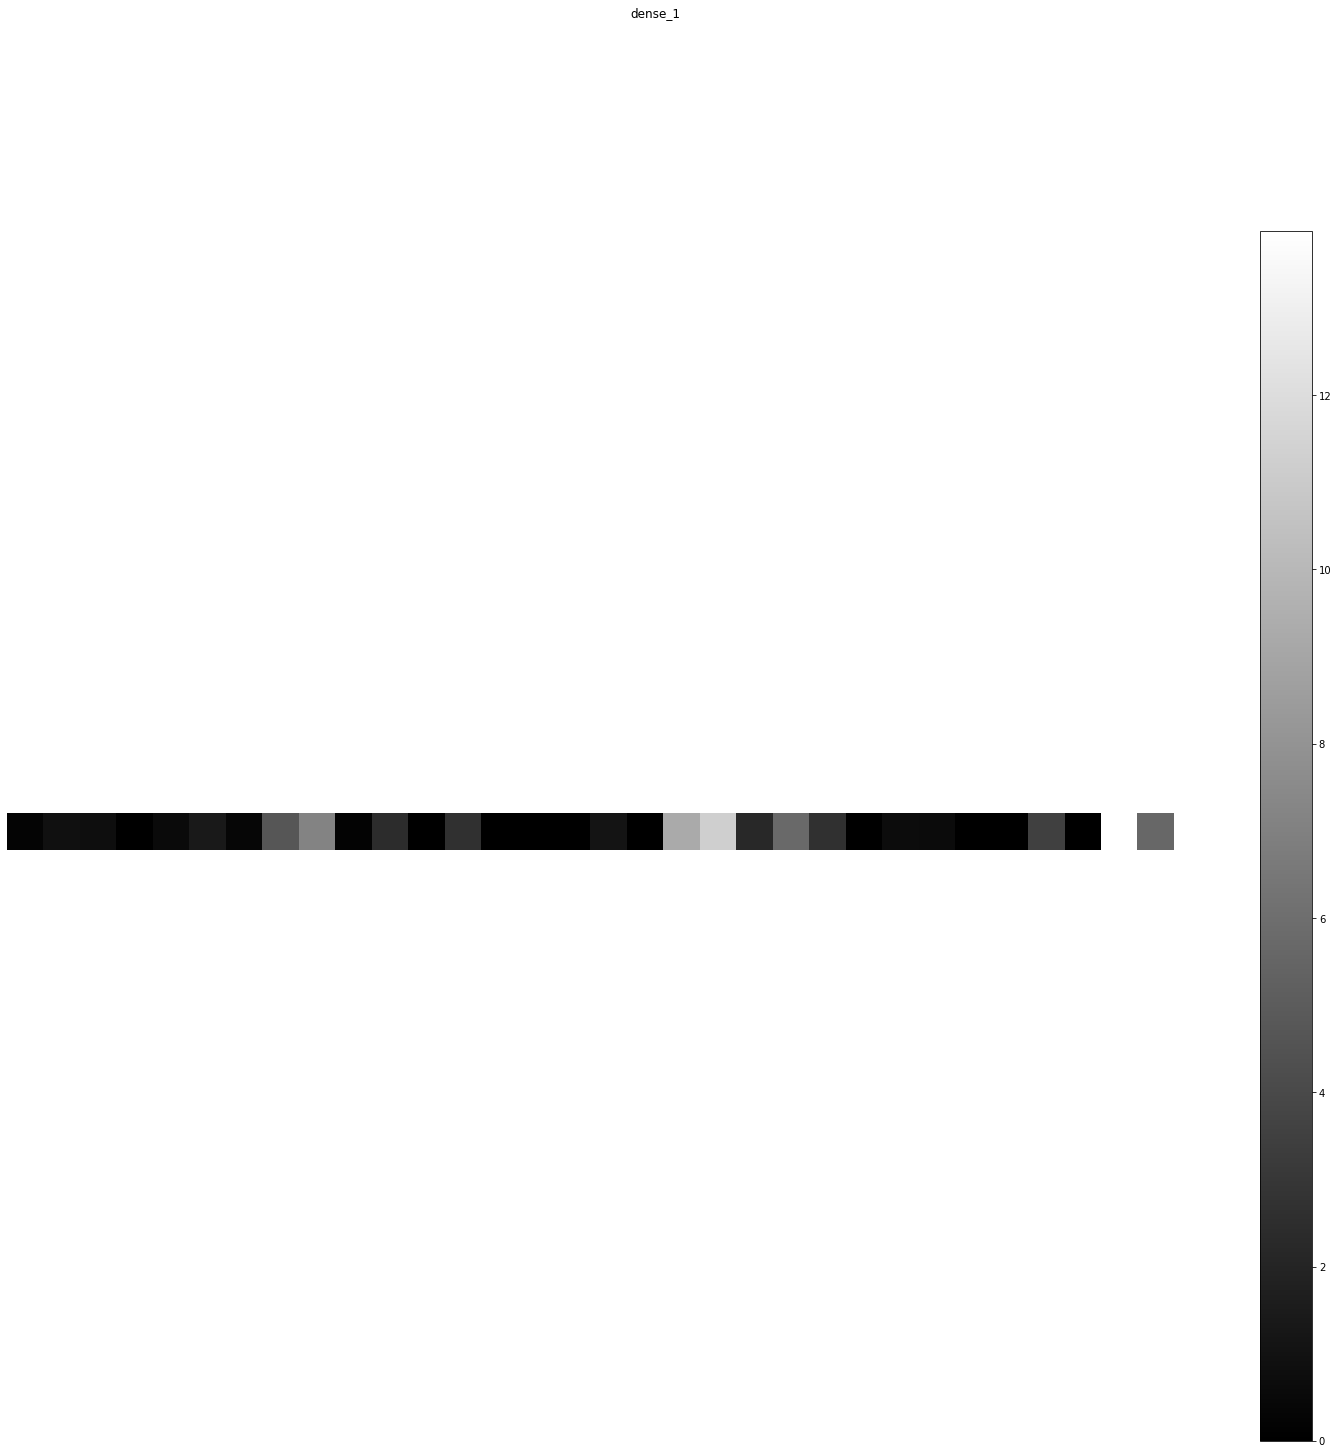

In [3]:
# -*- coding: utf-8 -*-
"""ML_ICP6_bonus.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1byfWBGTS3QDjQSyLnV8lz5QFGwFuFzYd
"""

from keras.layers import Input, Dense
from keras.models import Model
from keract import get_activations, display_activations

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

[train_loss, train_acc] = autoencoder.evaluate(x_train_noisy, x_train)
[test_loss, test_acc] = autoencoder.evaluate(x_test_noisy, x_test)

input_sample = x_test[:1]
activations = get_activations(encoder, input_sample)
display_activations(activations, cmap="gray", save=False)



# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [2]:
pip install keract